In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris= load_iris()
X=iris.data[:,[2,3]]
y=(iris.target == 0).astype(int)
per_clf=Perceptron()
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,0.5]])
print(y_pred)


[0]


In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.17.1
3.5.0


In [3]:

fashon_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashon_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
print(X_valid.shape)
print(y_valid.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
uint8
(5000, 28, 28)
(5000,)


In [4]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[1]]

'T-shirt/top'

In [5]:

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

print("Model.layers")
print(model.layers)
hidden1=model.layers[1]
print("Hidden1.name")
print(hidden1.name)
#model.get_layer('dense_12') is hidden1
weights,biases=hidden1.get_weights()
print("Weihgts")
print(weights)
print("Weihgts.shape")
print(weights.shape)
print("Biases")
print(biases)
print("Biases.shape")
print(biases.shape)

Model.layers
[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
Hidden1.name
dense
Weihgts
[[ 0.03087126  0.03938941 -0.01248362 ...  0.03305423  0.05549346
   0.05101137]
 [ 0.04445305  0.00712132  0.03845847 ... -0.03768137  0.04176988
  -0.05696343]
 [-0.0319789  -0.00208503  0.0126417  ...  0.03059357  0.0221025
   0.01875594]
 ...
 [-0.04691645 -0.00448418 -0.06739379 ... -0.00677334 -0.01369758
   0.06927928]
 [-0.0584275  -0.01661281 -0.06139341 ...  0.00667782 -0.0705957
   0.01442797]
 [-0.04337038  0.06361564 -0.01846871 ... -0.0694402   0.06923544
  -0.05894651]]
Weihgts.shape
(784, 300)
Biases
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

In [8]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:

history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6888 - loss: 0.9781 - val_accuracy: 0.8392 - val_loss: 0.4951
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8277 - loss: 0.4940 - val_accuracy: 0.8498 - val_loss: 0.4442
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8411 - loss: 0.4469 - val_accuracy: 0.8414 - val_loss: 0.4434
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8531 - loss: 0.4162 - val_accuracy: 0.8628 - val_loss: 0.3976
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3970 - val_accuracy: 0.8524 - val_loss: 0.4028
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8647 - loss: 0.3875 - val_accuracy: 0.8698 - val_loss: 0.3664
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8680 - loss: 0.3686 - val_accuracy: 0.8758 - val_loss: 0.3615
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8712 - loss: 0.360

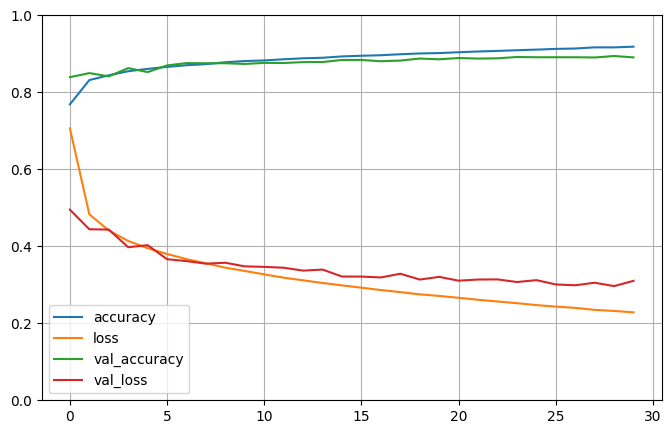

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [11]:

model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 60.1781


[62.424224853515625, 0.8539999723434448]

In [12]:
X_new=X_test[:3]
#print(X_new)
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_proba = model.predict(X_new) # Predict probabilities for each class
y_pred = y_proba.argmax(axis=-1) # Get the class with highest probability
#y_predy_pred=model.predict_classes(X_new)
print(y_pred)
#print(np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[9 2 1]


In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
	housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
	X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [15]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5004 - val_loss: 0.5817
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2043 - val_loss: 0.4492
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8654 - val_loss: 0.4184
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4537 - val_loss: 0.4045
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4134 - val_loss: 0.4036
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4137 - val_loss: 0.3840
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4052 - val_loss: 0.3830
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3915 - val_loss: 0.3753
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3788 - val_loss: 0.6480
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4462 - val_loss: 0.3788
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3835 - val_loss: 0.3732
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [16]:
print(mse_test)
print(type(mse_test))
print(y_pred)
print(type(y_pred))

0.3495021164417267
<class 'float'>
[[2.3718696]
 [1.6456493]
 [1.2485001]]
<class 'numpy.ndarray'>


In [17]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [18]:
!pip install scikeras
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model(learning_rate=3e-3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [19]:
keras_reg.fit(X_train,y_train,epochs=100,
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test=keras_reg.score(X_test,y_test)
y_pred=keras_reg.predict(X_new)
print(y_pred)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.6391 - val_loss: 0.9021
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8642 - val_loss: 0.6058
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6225 - val_loss: 0.5484
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5460 - val_loss: 0.5125
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5089 - val_loss: 0.4923
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4959 - val_loss: 0.4773
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4885 - val_loss: 0.4681
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4644 - val_loss: 0.4572
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4500 - val_loss: 0.4551
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4663 - val_loss: 0.4443
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4377 - val_loss: 0.4410
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━

In [20]:
print(mse_test)

0.7731594396568344


In [21]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

In [22]:
from scikeras.wrappers import KerasRegressor
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2),
}

keras_reg = KerasRegressor(
    model=build_model
)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
)

print("Mejores hiperparámetros:", rnd_search_cv.best_params_)


Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9283 - val_loss: 0.5015
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4800 - val_loss: 0.4293
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4155 - val_loss: 0.4012
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4120 - val_loss: 0.3982
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4216 - val_loss: 0.3943
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6498 - val_loss: 0.3700
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3868 - val_loss: 0.3788
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3689 - val_loss: 0.4099
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4087 - val_loss: 0.3522
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3656 - val_loss: 0.3621
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3647 - val_loss: 0.3468
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [23]:
rnd_search_cv.best_params_
rnd_search_cv.best_score_
model=rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'